** *Read the input file* **

In [2]:
import pandas as pd 
df = pd.read_excel('/content/drive/MyDrive/Equintel_Uma/esg_sentiment_data_for_uma_67K_updated.xlsx')


**Calculate the number of misclassifications with the Distilbert model**

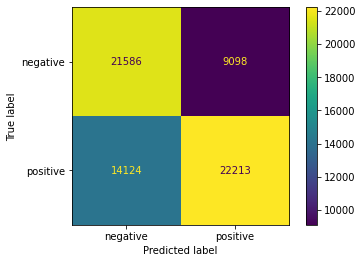

In [3]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pylab as pl

cm = confusion_matrix(df['automated_sentiment'], df['distilbert_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()


 *There are a total of 21586 true negatives and 22213 true positives. Hence 43,799 sentiments are classified correctly. There are 9098 sentiments which are actually negative but predicted positive. There are 14124 sentiments which are actually positive but predicted negative. Hence there are a total of 23,222 misclassifications.*

**Calculate the number of misclassifications for the roBERTa model**

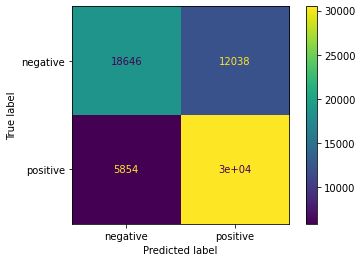

In [5]:
cm = confusion_matrix(df['automated_sentiment'], df['roberta_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()

*There are a total of 18646 true negatives and 3e+04 true positives. Hence 49069 sentiments are classified correctly. There are 12038 sentiments which are actually negative but predicted positive. There are 5854 sentiments which are actually positive but predicted negative. Hence there are a total of 17892 misclassifications.*

####
*From the above two comparisons we can see that the roBERTa model performs definitely better in predicting the sentiment.* ####

**Calculate the number of misclassifications for the Finbert model**

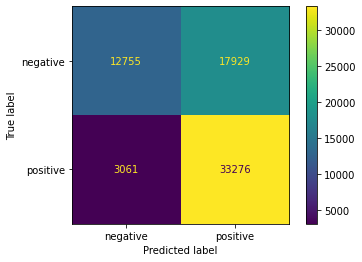

In [6]:
cm = confusion_matrix(df['automated_sentiment'], df['finbert_sentiment_new'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()

There are a total of 12755 true negatives and 33276 true positives. Hence 46,031 sentiments are classified correctly. There are 17929 sentiments which are actually negative but predicted positive. There are 3061 sentiments which are actually positive but predicted negative. Hence there are a total of 20,990 misclassifications.

**Find number of records which are predicted the same in both the models(Distilbert and Roberta): **

In [7]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']):    
    count+=1
print(count)

48101


A total of 48101 records are classified correctly by both the models. 

**Find number of records which are predicted the same in models like Distilbert and Roberta and equal to the True automated sentiment (Ground truth) **

In [8]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['automated_sentiment'] == row['distilbert_sentiment']) :    
    count+=1
print(count)

37004


*A total of 37004 records are predicted correctly as the ground truth in the Distilbert and Roberta model.*

 **Find records which are predicted the same in all three models **


In [9]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['roberta_sentiment'] == row['finbert_sentiment_new']):    
    count+=1
print(count)

38573


*A total of only 38573 records match in all the three models. *


Now, let's have a look at where the three models agree to the Ground truth:** 

In [11]:
count=0
title = []
sentiment = []

for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['roberta_sentiment'] == row['finbert_sentiment_new'] and (row['finbert_sentiment_new'] == row['automated_sentiment'])):    
    count+=1
    title.append(row['title'])
    sentiment.append(row['automated_sentiment'])

print(count)
data = {'title': title,' sentiment' : sentiment}
new_df= pd.DataFrame(data)
new_df.to_excel("/content/drive/MyDrive/Equintel_Uma/agreed_dataset_67K.xlsx")


30807


Hence we see a total of 30807 records which have the same predicted values by the three models. 

**Calculation of Performance metrics**

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Distilbert Model:** 

In [13]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('F1 score: %f' % f1)

Accuracy: 0.653512
Precision: 0.709431
Recall: 0.611305
F1 score: 0.656723


**roBERTa Model:** 

In [14]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['roberta_sentiment'])
print('F1 score: %f' % f1)

Accuracy: 0.733039
Precision: 0.716893
Recall: 0.838897
F1 score: 0.773111


**Finbert Model:**

In [15]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('F1 score: %f' % f1)

Accuracy: 0.686815
Precision: 0.649858
Recall: 0.915761
F1 score: 0.760229
